# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import os
from google.colab import userdata

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')
os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')

In [3]:
!kaggle datasets download -d iammustafatz/diabetes-prediction-dataset
!unzip diabetes-prediction-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset
License(s): copyright-authors
  0% 0.00/734k [00:00<?, ?B/s]
100% 734k/734k [00:00<00:00, 707MB/s]
Archive:  diabetes-prediction-dataset.zip
  inflating: diabetes_prediction_dataset.csv  


In [4]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
df.describe(include="all")

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,41.885856,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,NaN,22.516840,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,NaN,0.080000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,60.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


## Cek Duplikasi Data



In [7]:
print("Jumlah data duplikat: ", df.duplicated().sum())

Jumlah data duplikat:  3854


## Cek Missing Value

In [8]:
print("Jumlah missing value:\n", df.isna().sum())

Jumlah missing value:
 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


## Cek Outliers

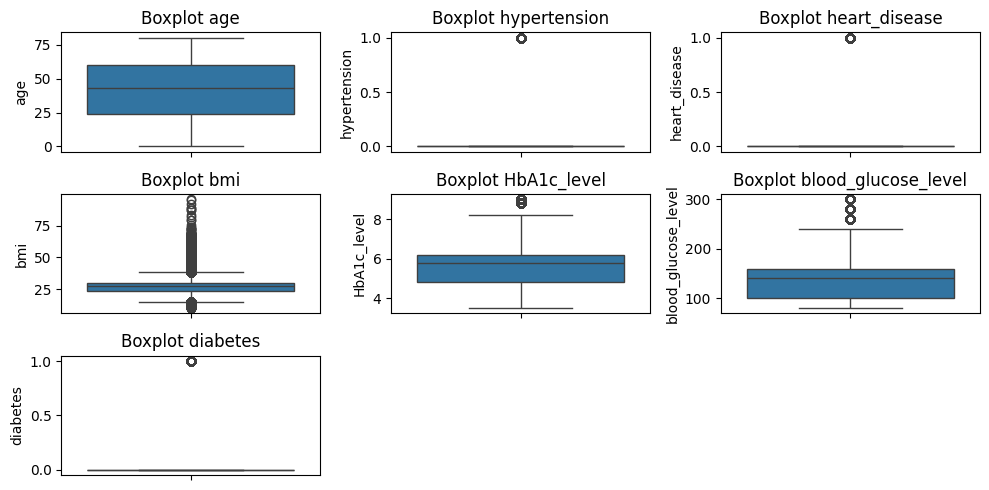

In [9]:
numeric_cols = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(10, 5))
for i, column in enumerate(numeric_cols, 1):
  plt.subplot(3, 3, i)
  sns.boxplot(data=df[column])
  plt.title(f'Boxplot {column}')

plt.tight_layout()
plt.show()

## Univariate Analysis

### Fitur Numerik

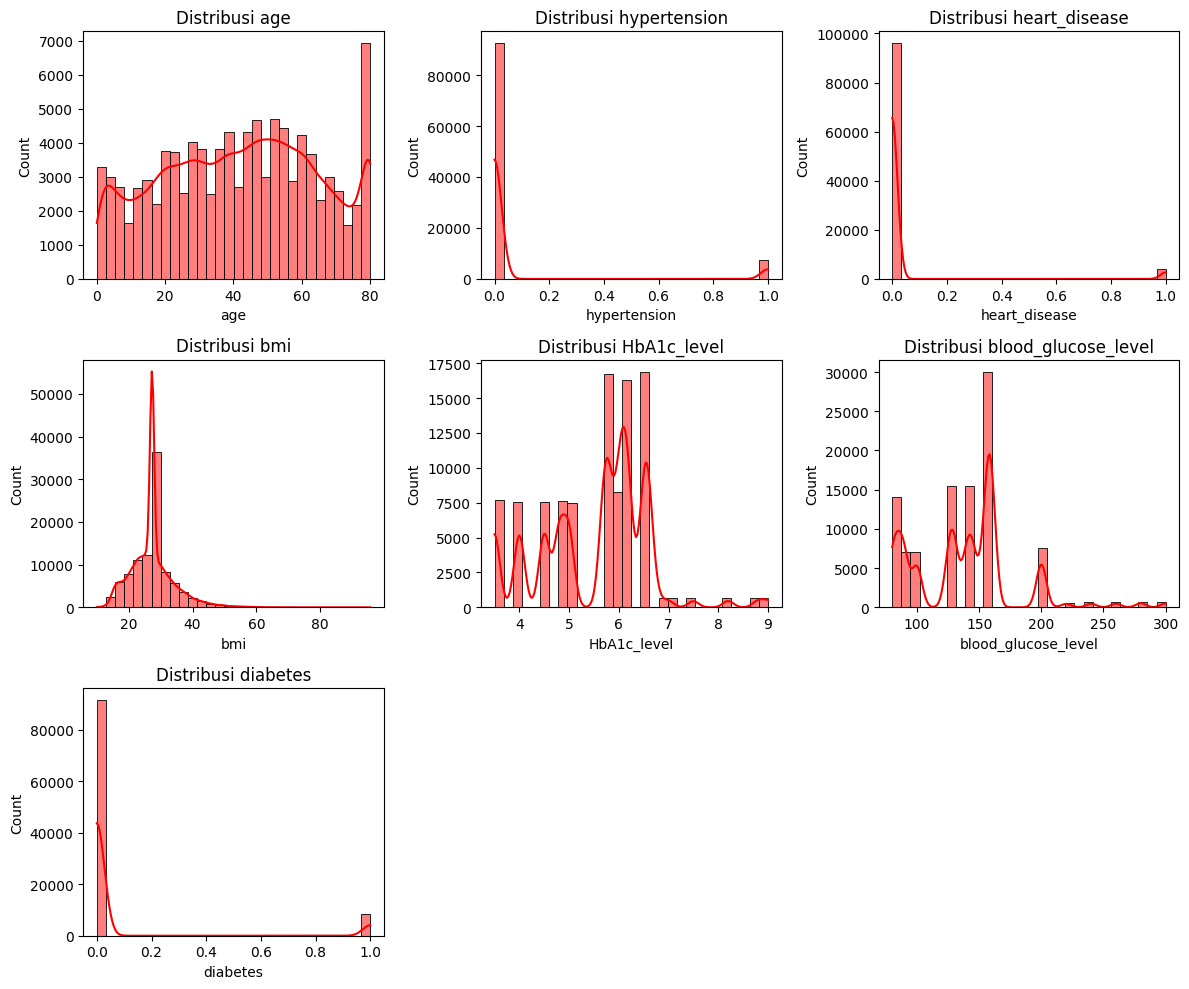

In [10]:
plt.figure(figsize=(12, 10))

for i, col in enumerate(numeric_cols, 1):
  plt.subplot(3, 3, i)
  sns.histplot(df[col], kde=True, bins=30, color='red')
  plt.title(f'Distribusi {col}')
  plt.xlabel(col)
  plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Fitur Kategorikal

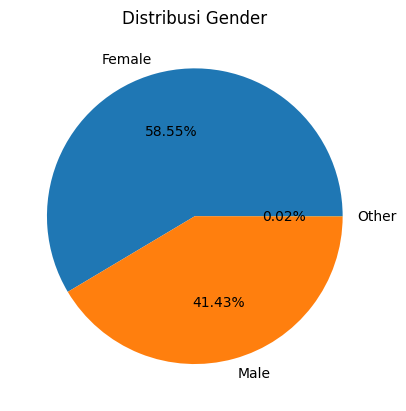

In [11]:
gender = df['gender'].value_counts()
gender.plot(kind='pie', title='Distribusi Gender', autopct='%1.2f%%', labels=gender.index)
plt.ylabel('')
plt.show()

/tmp/ipython-input-1813373183.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoking_history', data=df, palette='viridis')


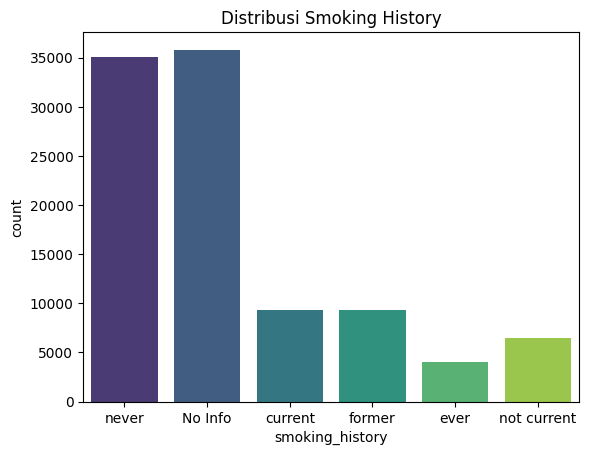

In [12]:
sns.countplot(x='smoking_history', data=df, palette='viridis')
plt.title('Distribusi Smoking History')
plt.show()

## Multivariate Analysis

Text(0.5, 1.0, 'Correlation Matrix')

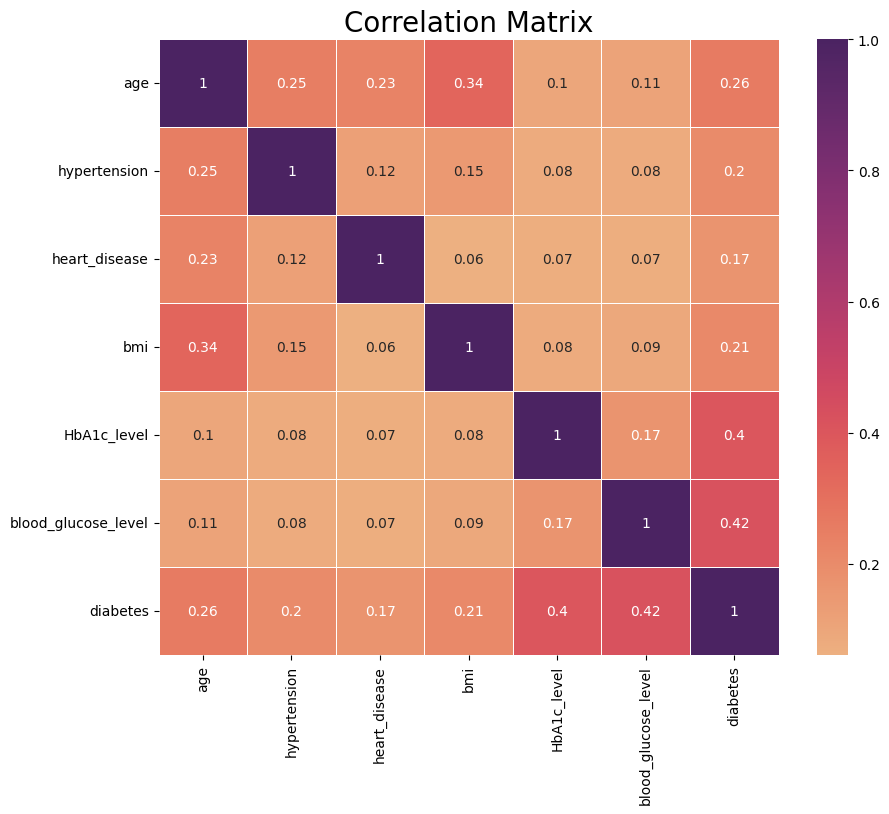

In [13]:
corr_matrix = df[numeric_cols].corr().round(2)

plt.figure(figsize=(10, 8))
sns.heatmap(data=corr_matrix, annot=True, cmap='flare', linewidth=0.5)
plt.title("Correlation Matrix", size=20)

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## Menghapus Missing Value

In [14]:
print("Jumlah missing value sebelum dihapus:\n", df.isna().sum())
df = df.dropna()
print("Jumlah missing value setelah dihapus:\n", df.isna().sum())

Jumlah missing value sebelum dihapus:
 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64
Jumlah missing value setelah dihapus:
 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


## Menghapus Data Duplikat

In [15]:
print("Jumlah data duplikat sebelum dihapus: ", df.duplicated().sum())
df = df.drop_duplicates()
print("Jumlah data duplikat setelah dihapus: ", df.duplicated().sum())

Jumlah data duplikat sebelum dihapus:  3854
Jumlah data duplikat setelah dihapus:  0


## Menghapus Outlier

In [16]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numeric_cols] < (Q1 - 1.5*IQR)) | (df[numeric_cols] > (Q3 + 1.5*IQR))).any(axis=1)]

In [17]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


## Encoding Data Kategorikal

In [ ]:
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1, 'Other':2})
df['smoking_history'] = df['smoking_history'].map({'No Info': 0, 'never': 1, 'current': 2, 'former': 3, 'ever': 4, 'not current': 5})
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,1,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
5,0,20.0,0,0,1,27.32,6.6,85,0
7,0,79.0,0,0,0,23.86,5.7,85,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,0,24.60,4.8,145,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,1,35.42,4.0,100,0


## Pemisahan Fitur dan Target

In [19]:
X = df.drop(columns='diabetes')
y = df['diabetes']

In [20]:
X.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,1,27.32,5.7,158
3,0,36.0,0,0,2,23.45,5.0,155
5,0,20.0,0,0,1,27.32,6.6,85
7,0,79.0,0,0,0,23.86,5.7,85
8,1,42.0,0,0,1,33.64,4.8,145
9,0,32.0,0,0,1,27.32,5.0,100
10,0,53.0,0,0,1,27.32,6.1,85
12,0,78.0,0,0,3,36.05,5.0,130
13,0,67.0,0,0,1,25.69,5.8,200


In [21]:
y.head(10)

,diabetes
1,0
2,0
3,0
5,0
7,0
8,0
9,0
10,0
12,0
13,0


## Normalisasi Fitur

In [22]:
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])
X

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
1,-0.830634,0.743335,0.0,0.0,-0.859091,0.266348,1.238446,-1.542058
2,1.201564,-0.449306,0.0,0.0,-0.168298,0.266348,0.311365,0.735875
3,-0.830634,-0.082340,0.0,0.0,0.522496,-0.475975,-0.409697,0.648262
5,-0.830634,-0.816273,0.0,0.0,-0.168298,0.266348,1.238446,-1.396037
7,-0.830634,1.890106,0.0,0.0,-0.859091,-0.397331,0.311365,-1.396037
...,...,...,...,...,...,...,...,...
99994,-0.830634,-0.082340,0.0,0.0,-0.859091,-0.255388,-0.615715,0.356220
99996,-0.830634,-1.641948,0.0,0.0,-0.859091,-1.642209,1.135437,-0.957973
99997,1.201564,1.293785,0.0,0.0,1.213290,0.364174,0.311365,0.648262
99998,-0.830634,-0.632790,0.0,0.0,-0.168298,1.820048,-1.439786,-0.957973


## Split Data Train Testing

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
print(f'Ukuran dataset: {X.shape}')
print(f'Ukuran sampel pada train dataset: {X_train.shape}')
print(f'Ukuran sampel pada test dataset: {X_test.shape}')

Ukuran dataset: (76641, 8)
Ukuran sampel pada train dataset: (61312, 8)
Ukuran sampel pada test dataset: (15329, 8)


## Menyimpan Hasil Preprocessing

In [25]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

os.makedirs("diabetes_prediction_preprocessing", exist_ok=True)

df_train.to_csv("diabetes_prediction_preprocessing/diabetes_train.csv", index=False)
df_test.to_csv("diabetes_prediction_preprocessing/diabetes_test.csv", index=False)